In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("S_bank_additional.csv", sep =";")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 675.9+ KB


In [4]:
data['y'] = data['y'].str.lower().replace({'yes': 1, 'no' : 0})

In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4119.0,40.113620,10.313362,18.000,32.000,38.000,47.000,88.000
duration,4119.0,256.788055,254.703736,0.000,103.000,181.000,317.000,3643.000
campaign,4119.0,2.537266,2.568159,1.000,1.000,2.000,3.000,35.000
pdays,4119.0,960.422190,191.922786,0.000,999.000,999.000,999.000,999.000
previous,4119.0,0.190337,0.541788,0.000,0.000,0.000,0.000,6.000
emp.var.rate,4119.0,0.084972,1.563114,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,4119.0,93.579704,0.579349,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,4119.0,-40.499102,4.594578,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,4119.0,3.621356,1.733591,0.635,1.334,4.857,4.961,5.045
nr.employed,4119.0,5166.481695,73.667904,4963.600,5099.100,5191.000,5228.100,5228.100


In [7]:
pandas_profiling.ProfileReport(data)

Number of variables,21
Number of observations,4119
Total Missing (%),0.0%
Total size in memory,675.9 KiB
Average record size in memory,168.0 B
Numeric,8
Categorical,10
Boolean,1
Date,0
Text (Unique),0
Rejected,2


In [8]:
data= data.dropna()
print(data.shape)
print(data.columns)

(4119, 21)
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [9]:
data.isnull().sum().sum()

0

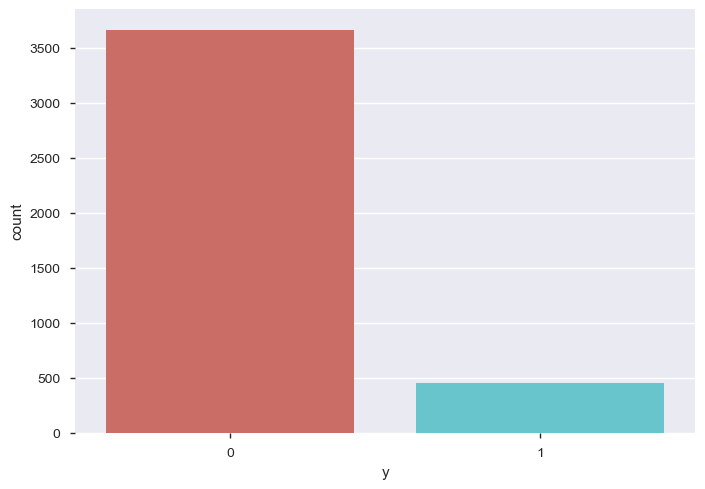

In [10]:
#dependent variable distribution (response vs. non response)
sns.countplot(x='y',data= data,palette='hls')

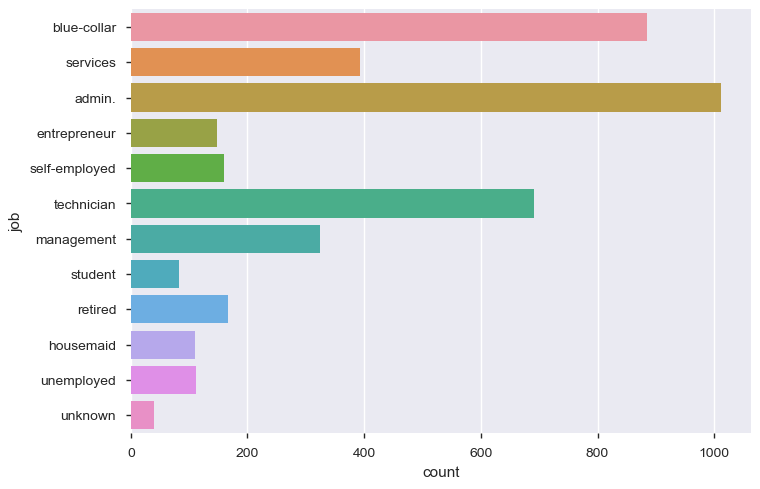

In [11]:
# customer job distribution
sns.countplot(y= 'job',data= data)
plt.show()

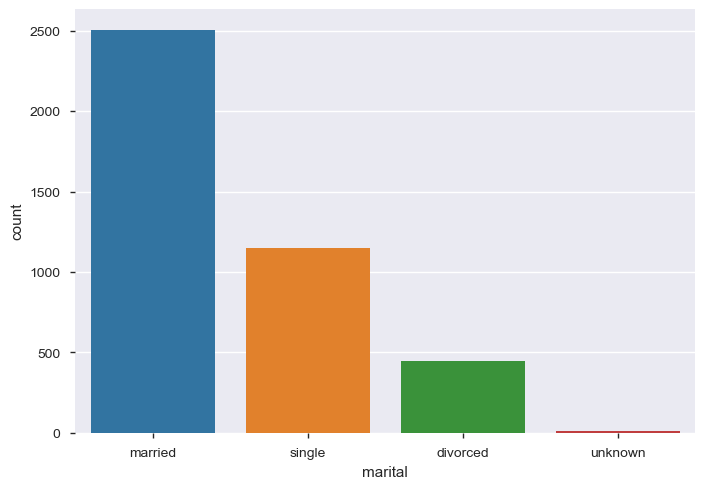

In [12]:
#customer marital status distribution
sns.countplot(x='marital',data=data)
plt.show()

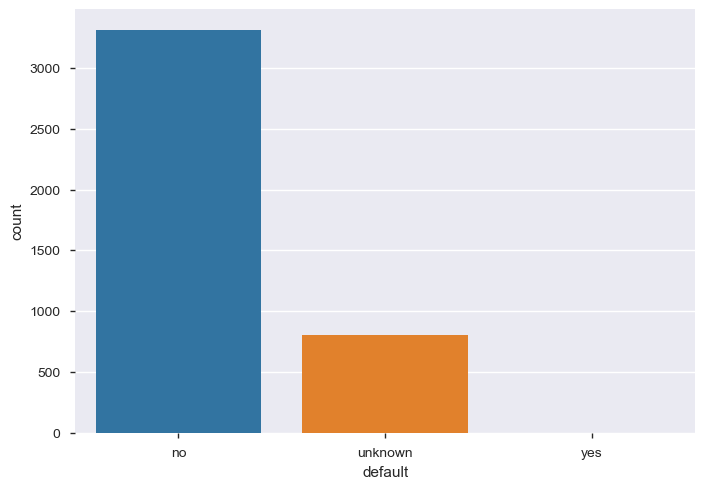

In [13]:
#distribution of Default
sns.countplot(x= 'default',data=data)

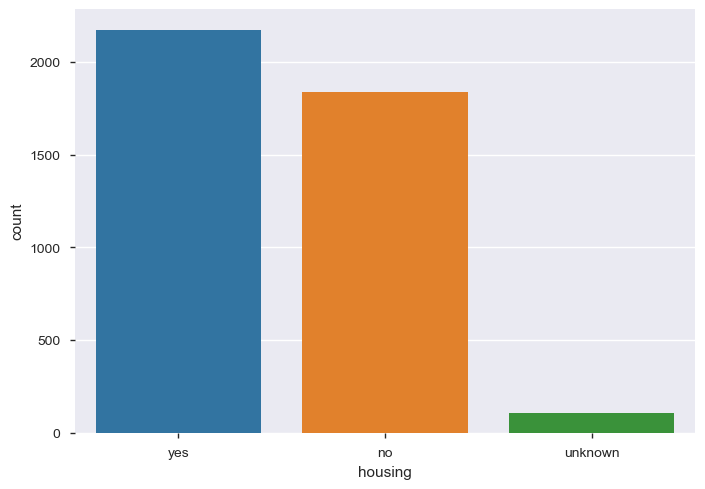

In [14]:
#house loan Distribution
sns.countplot(x='housing',data=data)

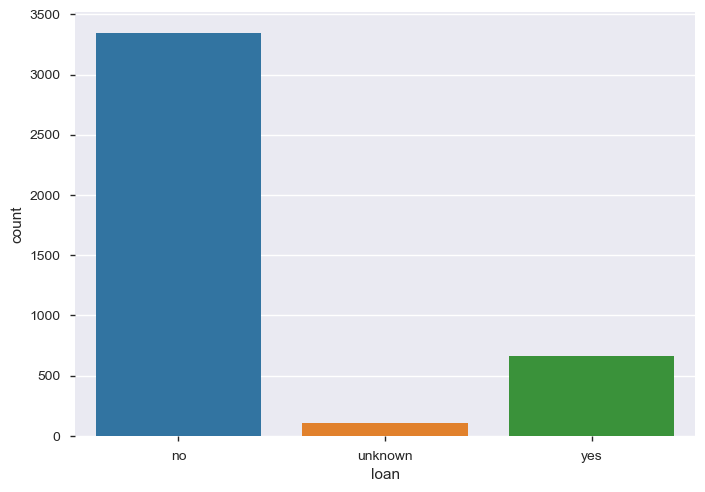

In [15]:
#personal loan 
sns.countplot(x='loan', data=data)

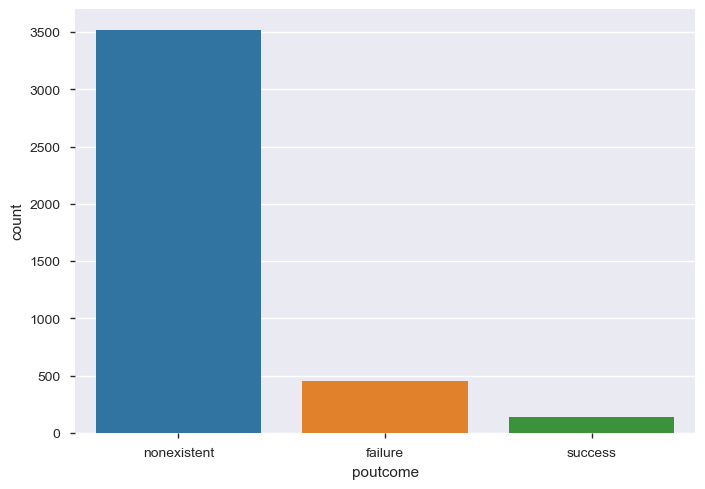

In [16]:
#previous marketing campaign response
sns.countplot(x='poutcome',data=data)

In [17]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


##### Observations:
- The average age of customers who bought the term deposit is higher than that of the customers who didn’t.
- The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.
- Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

In [18]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
job,,,,,,,,,,,
admin.,38.240119,261.871542,2.642292,944.025692,0.192688,0.061462,93.527008,-40.014723,3.601909,5165.542885,0.131423
blue-collar,39.265837,261.852941,2.432127,983.270362,0.147059,0.235520,93.669430,-41.571493,3.742370,5174.265611,0.069005
entrepreneur,42.202703,249.202703,2.216216,992.263514,0.141892,0.263514,93.614682,-40.839865,3.931493,5180.600000,0.054054
housemaid,45.672727,229.663636,2.463636,980.909091,0.100000,0.426364,93.658536,-39.324545,4.009182,5179.862727,0.100000
management,42.429012,246.799383,2.432099,953.015432,0.246914,-0.049691,93.483056,-40.591667,3.553451,5165.971914,0.092593
retired,60.873494,311.789157,2.397590,897.301205,0.325301,-0.580120,93.487506,-39.034337,2.875741,5126.062048,0.228916
self-employed,40.679245,254.924528,2.817610,967.691824,0.207547,0.086164,93.575283,-40.323899,3.669296,5166.974843,0.081761
services,38.513995,232.529262,2.844784,978.773537,0.178117,0.067684,93.626059,-41.532061,3.552776,5165.806870,0.089059
student,26.695122,287.134146,1.951220,902.426829,0.487805,-1.192683,93.448329,-39.665854,2.165354,5092.046341,0.231707


In [19]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
marital,,,,,,,,,,,
divorced,45.107623,263.163677,2.542601,972.255605,0.174888,0.143274,93.600547,-40.621973,3.707177,5170.145964,0.096413
married,42.389398,256.289757,2.527700,964.162216,0.173774,0.172260,93.599039,-40.357114,3.728554,5170.724472,0.100438
single,33.209020,254.647875,2.555941,947.338248,0.233304,-0.128448,93.529971,-40.768257,3.352657,5155.756114,0.134432
unknown,42.272727,336.272727,2.545455,999.000000,0.090909,0.181818,93.537545,-39.690909,3.855182,5174.409091,0.090909


In [20]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
basic.4y,47.657343,255.682984,2.421911,973.524476,0.142191,0.291841,93.666193,-40.465501,3.828089,5174.093939,0.088578
basic.6y,40.144737,259.000000,2.649123,985.881579,0.140351,0.271053,93.689114,-41.539912,3.810469,5176.600000,0.074561
basic.9y,39.231707,250.538328,2.348432,979.963415,0.158537,0.183275,93.640805,-41.443554,3.722737,5173.182578,0.074913
high.school,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
professional.course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
university.degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


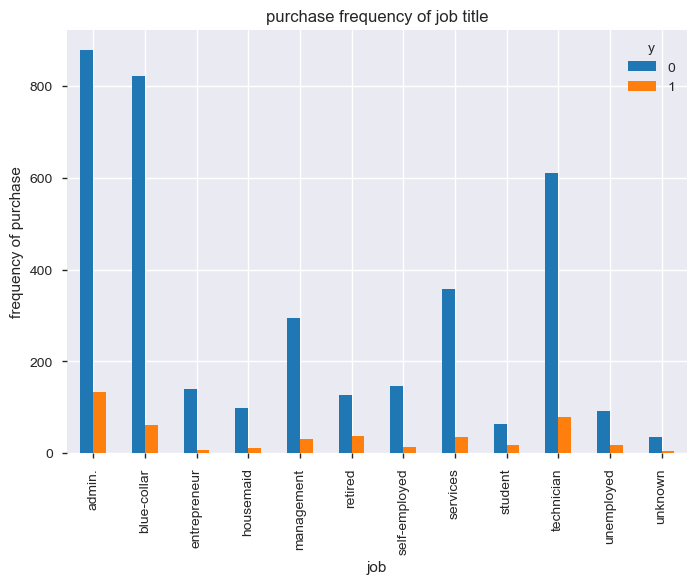

In [21]:
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('purchase frequency of job title')
plt.xlabel('job')
plt.ylabel('frequency of purchase')
plt.savefig('purchase_fre_job')

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

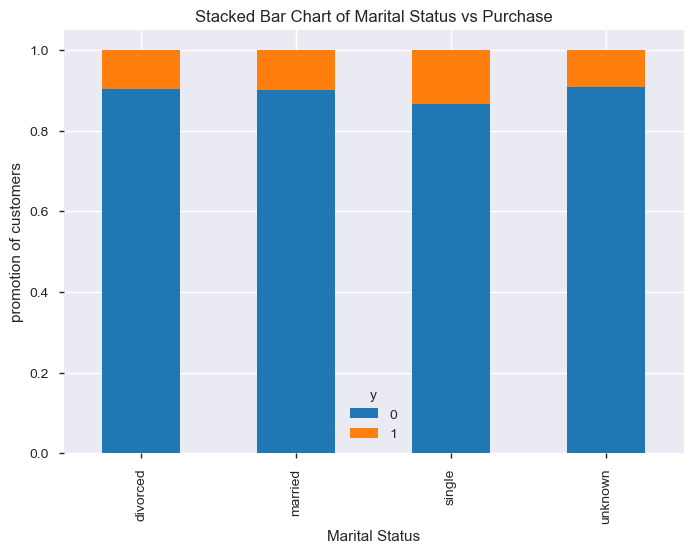

In [22]:
table= pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('promotion of customers')
plt.savefig('marital_vs_pur_stack')

The marital status does not seem a strong predictor for the outcome variable.

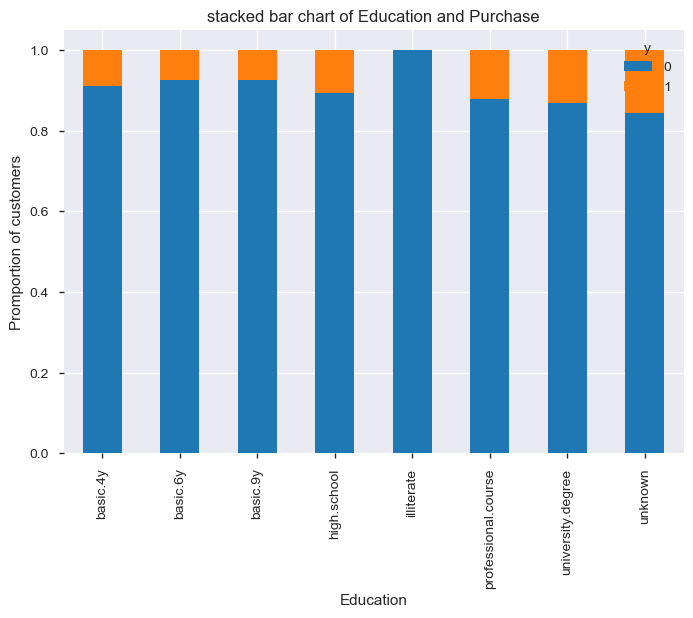

In [23]:
table = pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('stacked bar chart of Education and Purchase')
plt.xlabel('Education')
plt.ylabel('Promportion of customers')
plt.savefig('edu_vs_pur_stack')

Education seems a good predictor of the outcome variable.

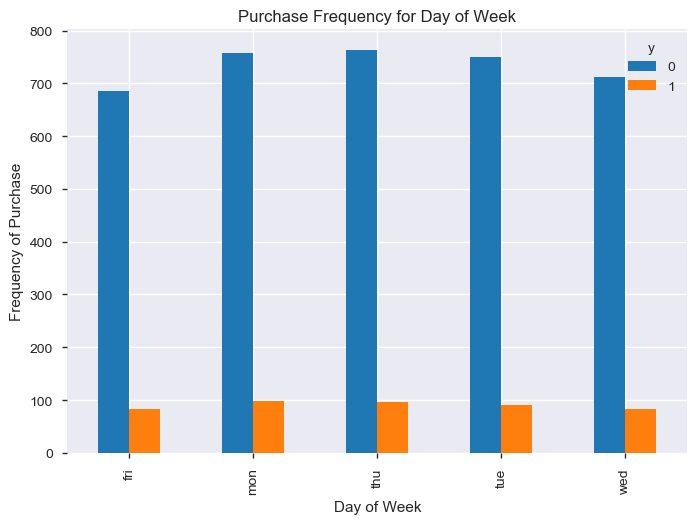

In [24]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

Day of week may not be a good predictor of the outcome.

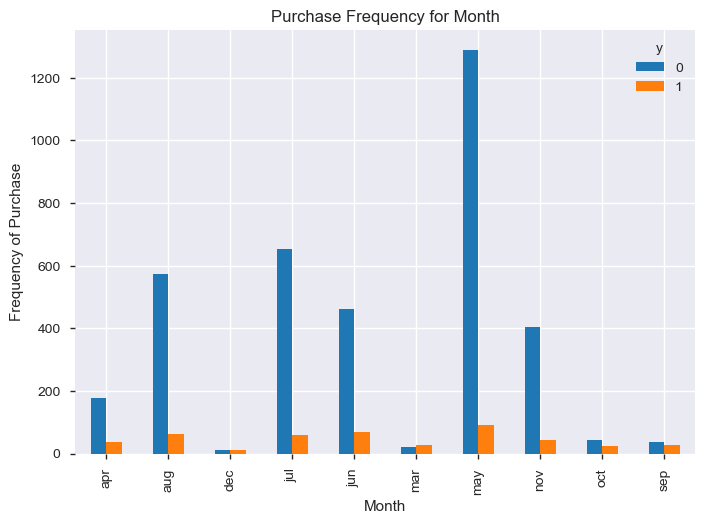

In [25]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

Month might be a good predictor of the outcome variable.

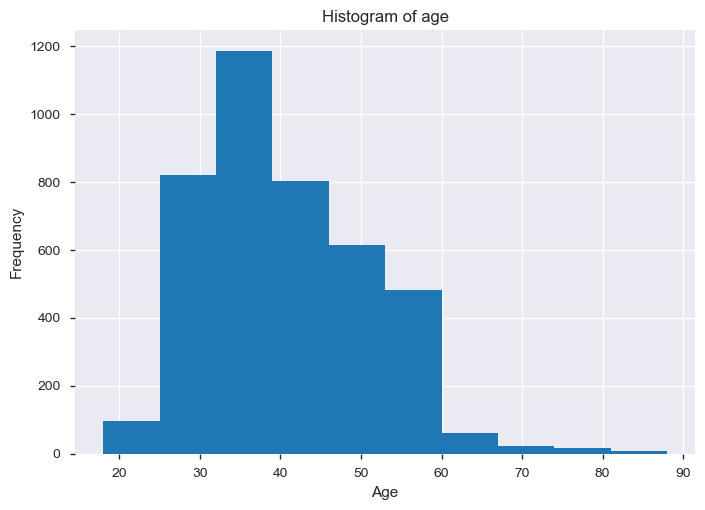

In [26]:
data.age.hist()
plt.title('Histogram of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

Most of the customers of the bank in this dataset are in the age range of 30–40.

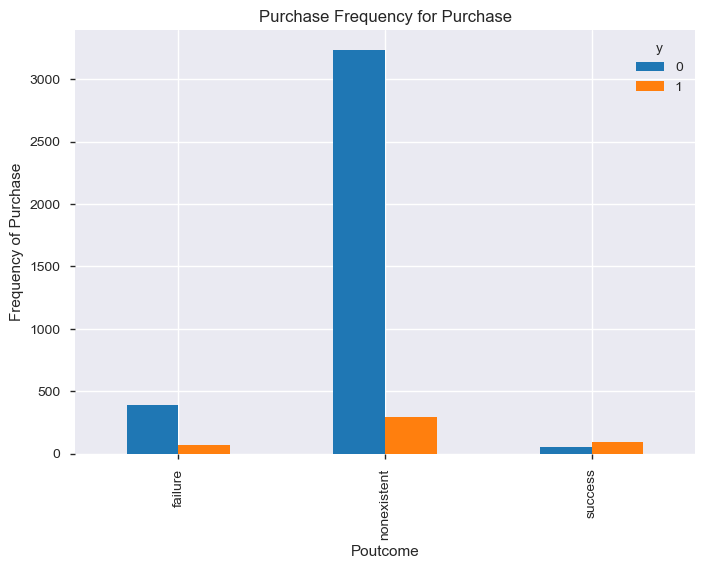

In [27]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Purchase')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

Poutcome seems to be a good predictor of the outcome variable.

In [28]:
#creating dummy variables
cat_var = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_var:
    cat_list = 'var'+'_'+var
    cat_list = pd.get_dummies(data[var],prefix=var)
    data1=data.join(cat_list)
    data=data1


In [29]:
data_var=data.columns.values.tolist()
keep = [i for i in data_var if i not in cat_var]

In [30]:
data_final= data[keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'mo

In [31]:
data_final_var = data_final.columns.values.tolist()
y=['y']
x= [i for i in data_final_var if i not in y]

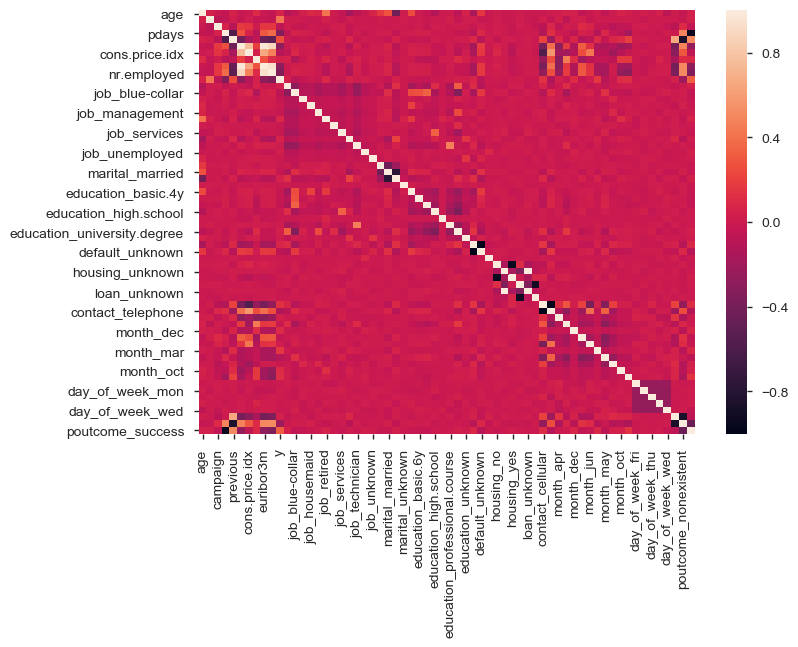

In [32]:
sns.heatmap(data_final.corr())

### Feature Selection
#### Recursive Feature Elimination (RFE)

In [33]:
#Feature Selection
from sklearn  import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [34]:
log_reg = LogisticRegression()
rfe= RFE(log_reg,18)
rfe= rfe.fit(data_final[x], data_final[y])
print(rfe.support_)
print(rfe.ranking_)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'l

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[False False False False  True False False False  True False False  True
  True False  True False  True  True False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False  True False False  True
  True  True  True  True False  True False False False False False False
  True  True  True]
[31 37 14 41  1  9 24 22  1 36 20  1  1 32  1 33  1  1 27 30  5 43 15 40
 28 46 29  6 38 23 44  7  8  2 18 19 45  3 11 16 17  1 10 13  1 35 21  1
  1  1  1  1 12  1 42 34 25 39 26  4  1  1  1]


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [35]:
zipped = zip(x,rfe.ranking_)
s = list (sorted(zipped, key = lambda x:x[1]))
a,b=map(list,zip(*s))
top18 = a[:18]
print(top18)

['previous', 'euribor3m', 'job_blue-collar', 'job_entrepreneur', 'job_management', 'job_self-employed', 'job_services', 'loan_unknown', 'contact_telephone', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_oct', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']


In [36]:
X = data_final[top18]
y= data_final['y']

### Implementing the model

In [37]:
# Using StandardScaler, all X variables turned to -1 to 1 
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_scaled = pd.DataFrame(sc.fit_transform(X))
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.351356,-1.331707,1.912983,-0.193055,-0.292191,-0.200378,-0.324769,-0.161736,-0.743752,-0.073279,-0.456757,-0.384283,-0.108585,1.410360,-0.130526,-0.351958,0.411308,-0.188958
1,-0.351356,0.711698,-0.522744,-0.193055,-0.292191,-0.200378,3.079110,-0.161736,1.344534,-0.073279,-0.456757,-0.384283,-0.108585,1.410360,-0.130526,-0.351958,0.411308,-0.188958
2,-0.351356,0.773427,-0.522744,-0.193055,-0.292191,-0.200378,3.079110,-0.161736,1.344534,-0.073279,-0.456757,2.602249,-0.108585,-0.709039,-0.130526,-0.351958,0.411308,-0.188958
3,-0.351356,0.771697,-0.522744,-0.193055,-0.292191,-0.200378,3.079110,6.182926,1.344534,-0.073279,-0.456757,2.602249,-0.108585,-0.709039,-0.130526,-0.351958,0.411308,-0.188958
4,-0.351356,0.328632,-0.522744,-0.193055,-0.292191,-0.200378,-0.324769,-0.161736,-0.743752,-0.073279,-0.456757,-0.384283,-0.108585,-0.709039,-0.130526,-0.351958,0.411308,-0.188958


### Logistic Regression

In [38]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size= 0.3,random_state=0)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_pred = log_reg.predict(X_test)
print('Accuracyof logistic regression classifier on test set: {:.2f}'.format(log_reg.score(X_test,y_test)))

Accuracyof logistic regression classifier on test set: 0.90


### Cross Validation

In [41]:
# 10-Fold cross Validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10,random_state =721)
model_cv = LogisticRegression()
scoring = 'accuracy'
results= model_selection.cross_val_score(model_cv,X_train,y_train,cv = kfold,scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" %(results.mean()))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

10-fold cross validation average accuracy: 0.898


In [42]:
#confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[1098   16]
 [ 102   20]]


In [43]:
#compute precision,recall,F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1114
           1       0.56      0.16      0.25       122

    accuracy                           0.90      1236
   macro avg       0.74      0.57      0.60      1236
weighted avg       0.88      0.90      0.88      1236



Interception of the entire test set,88% of the promoted term deposit were the term depposit that the customer liked, of the entire test set 90% of the customer's preffered term deposits that were promoted.

In [44]:
log_reg.predict_proba(X_train)[:,1]

array([0.05789918, 0.01578984, 0.03821951, ..., 0.27639162, 0.05620868,
       0.05630109])

## Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [46]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Text(67.86111111111111, 0.5, 'Predicted label')

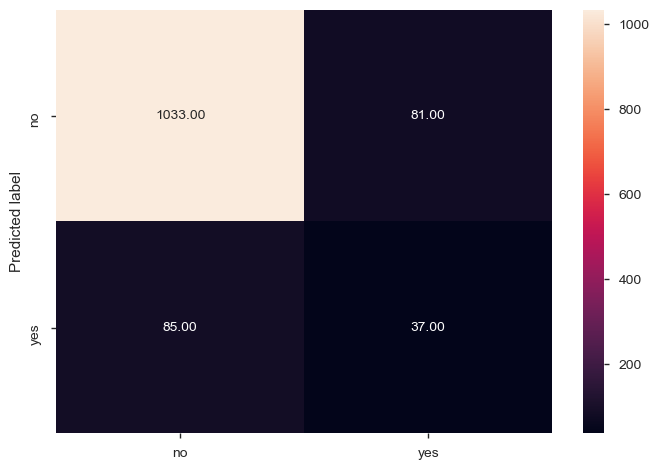

In [47]:
nb_cm = metrics.confusion_matrix(y_test,nb.predict(X_test))
sns.heatmap(nb_cm,annot=True,fmt= '.2f',xticklabels=['no','yes'],yticklabels=['no','yes'])
plt.ylabel('True label')
plt.ylabel('Predicted label')

In [48]:
metrics.accuracy_score(y_test,nb.predict(X_test))

0.8656957928802589

Naive Bayes average accuracy: 0.865

## KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
tuned_param = [{'n_neighbors': [3,5,7,9,11]}]
knn= GridSearchCV(KNeighborsClassifier(),
                  tuned_param,
                  cv=5,
                  scoring='accuracy')

In [51]:
knn.fit(X_train,y_train)
knn.best_params_


{'n_neighbors': 11}

In [52]:
knn.best_score_

0.8931668400971211

In [53]:
#Building for the n_neighbors=11
knn = KNeighborsClassifier(n_neighbors=11)

In [54]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [55]:
knn_cm = metrics.confusion_matrix(y_test,knn.predict(X_test))

Text(0.5, 28.3611111111111, 'Predicted label')

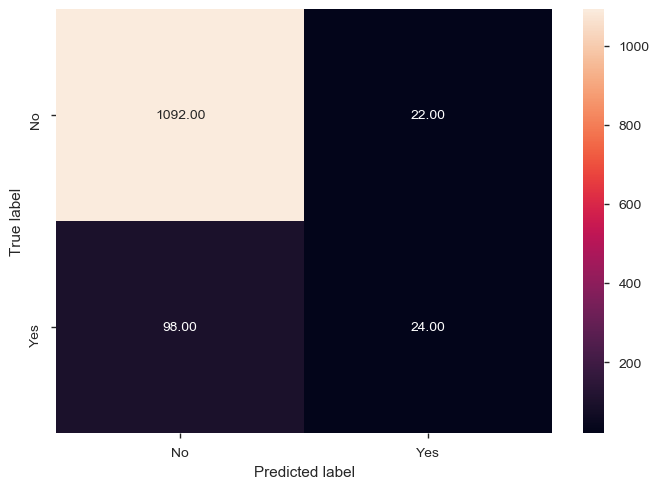

In [56]:
sns.heatmap(knn_cm, annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [57]:
#Compute precision,recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test,knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1114
           1       0.52      0.20      0.29       122

    accuracy                           0.90      1236
   macro avg       0.72      0.59      0.62      1236
weighted avg       0.88      0.90      0.88      1236



In [58]:
accuracy=metrics.accuracy_score( y_test, knn.predict( X_test ) )
AUC=metrics.roc_auc_score( y_test, knn.predict( X_test ))

print("KNN model accuracy: %.3f" % (accuracy))
print("KNN model AUC: %.3f" % (AUC))

KNN model accuracy: 0.903
KNN model AUC: 0.588


#### We will now rebuild the model after re-balancing the data
Oversampling & Undersampling for imbalance data

In [59]:
import imblearn.over_sampling as os

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [62]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=450)
X_ros_train, y_ros_train = ros.fit_sample(X_train, y_train)
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_ros_train)))

Original dataset shape Counter({0: 2554, 1: 329})
Resampled dataset shape Counter({0: 2554, 1: 2554})


### Rebuilding the models

### Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
log_reg = LogisticRegression()
log_reg.fit(X_ros_train,y_ros_train)


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
y_pred = log_reg.predict(X_test)
print('Accuracyof logistic regression classifier on test set: {:.2f}'.format(log_reg.score(X_test,y_test)))

Accuracyof logistic regression classifier on test set: 0.77


### Cross Validation

In [65]:
# 10-Fold cross Validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10,random_state =721)
model_cv = LogisticRegression()
scoring = 'accuracy'
results= model_selection.cross_val_score(model_cv,X_ros_train,y_ros_train,cv = kfold,scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" %(results.mean()))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

10-fold cross validation average accuracy: 0.721


In [66]:
#confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[879 235]
 [ 49  73]]


In [67]:
#compute precision,recall,F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86      1114
           1       0.24      0.60      0.34       122

    accuracy                           0.77      1236
   macro avg       0.59      0.69      0.60      1236
weighted avg       0.88      0.77      0.81      1236



Interception of the entire test set,88% of the promoted term deposit were the term depposit that the customer liked, of the entire test set 70% of the customer's preffered term deposits that were promoted.

### Naive Bayes

In [68]:
nb = GaussianNB()
nb.fit(X_ros_train,y_ros_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Text(67.86111111111111, 0.5, 'Predicted label')

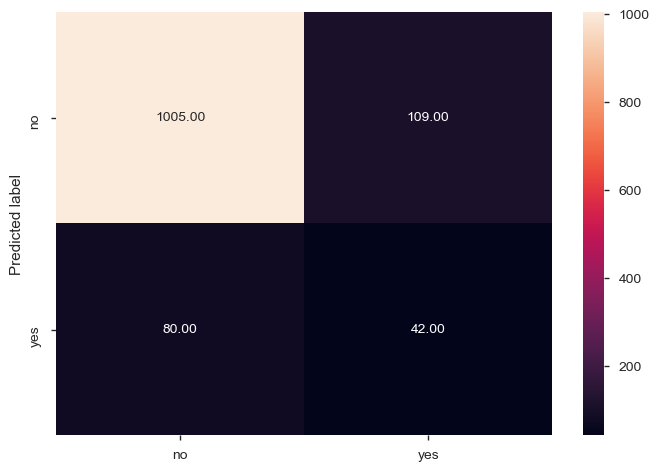

In [69]:
nb_cm = metrics.confusion_matrix(y_test,nb.predict(X_test))
sns.heatmap(nb_cm,annot=True,fmt= '.2f',xticklabels=['no','yes'],yticklabels=['no','yes'])
plt.ylabel('True label')
plt.ylabel('Predicted label')

In [70]:
metrics.accuracy_score(y_test,nb.predict(X_test))

0.8470873786407767

Naive Bayes average accuracy: 0.847

### KNN

In [71]:
knn.fit(X_ros_train,y_ros_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [72]:
accuracy = metrics.accuracy_score(y_test,knn.predict(X_test))
AUC = metrics.roc_auc_score(y_test,knn.predict(X_test))

print('KNN model accuracy: %.3f'%(accuracy))
print('KNN model AUC%.3f'%(AUC))

KNN model accuracy: 0.839
KNN model AUC0.692
